# Libraries

In [ ]:
from google.colab import drive
import os as os
from requests import get

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

# Data

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
dir = os.path.join('gdrive', 'My Drive', 'Eurostat', '03 - Data Science for Unstructured Data')
data_dir = os.path.join(dir, 'data')

Mounted at /content/gdrive


In [ ]:
!cd "gdrive${dir}" && mkdir -p data

In [ ]:
def download_save(url, filename):
  res = get(url)
  if res.status_code != 200:
    print(f"Couldn't fetch data from {url}")
  else:
    csv_file = open(os.path.join(data_dir, filename), 'wb')
    csv_file.write(res.content)
    csv_file.close()

## Wine

In [2]:
%%html
<iframe src="https://archive.ics.uci.edu/ml/datasets/wine+quality" width="1100" height="600"></iframe>

In [ ]:
download_save('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
              'wine.csv')

In [ ]:
df_wine = pd.read_csv(os.path.join(data_dir, 'wine.csv'), sep=';')
print(df_wine.shape)
df_wine.sample(10)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1565,6.7,0.670,0.02,1.9,0.061,26.0,42.0,0.99489,3.39,0.82,10.9,6
882,8.4,0.310,0.29,3.1,0.194,14.0,26.0,0.99536,3.22,0.78,12.0,6
950,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
676,10.8,0.400,0.41,2.2,0.084,7.0,17.0,0.99840,3.08,0.67,9.3,6
1415,6.2,0.580,0.00,1.6,0.065,8.0,18.0,0.99660,3.56,0.84,9.4,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
897,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
1506,6.8,0.810,0.05,2.0,0.070,6.0,14.0,0.99562,3.51,0.66,10.8,6


## Diabetes
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
download_save('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv',
              'pima.csv')

In [ ]:
df_pima = pd.read_csv(os.path.join(data_dir, 'pima.csv'),
                      header=8,
                      names = ['preg', 'gluc', 'pres', 'skin' ,'insu', 'bmi', 'pedi', 'age', 'class'])
df_pima.sample(10)

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
93,4,134,72,0,0,23.8,0.277,60,1
358,12,88,74,40,54,35.3,0.378,48,0
487,0,173,78,32,265,46.5,1.159,58,0
473,7,136,90,0,0,29.9,0.210,50,0
484,0,145,0,0,0,44.2,0.630,31,1
470,1,144,82,40,0,41.3,0.607,28,0
301,2,144,58,33,135,31.6,0.422,25,1
337,5,115,76,0,0,31.2,0.343,44,1
686,3,130,64,0,0,23.1,0.314,22,0
514,3,99,54,19,86,25.6,0.154,24,0


# Stochastic Gradient Descent
- Sample some training data, run it through the network to make predictions.

- Measure the loss between the predictions and the true values.

- Adjust the weights in a direction that makes the loss smaller.

- Repeat until the loss is small enough / does not decrease anymore.


In [ ]:
%%html
<img src="https://i.imgur.com/rFI1tIk.gif"/ width="100%">

## Learning Rate

- _Adam_ is a great general-purpose optimizer with an adaptive learning rate and sensible defaults.

## Batch Size
- On how many samples do you train at each iteration?

## ❓ Exercise

1. Create the follwoing multilayer perceptron (MLP) to solve the wine quality regression problem:
- Hidden layer with 512 units and ReLu activation
- Hidden layer with 512 units and ReLu activation
- Hidden layer with 512 units and ReLu activation
- Output layer without activation

2. Try small (e.g. 16) and large (e.g. 256) batch sizes. What do you observe?

3. Try small (e.g. 0.001) and large (e.g. 0.9) learning rates. What do you observe?

In [ ]:
X = df_wine.copy()
y = X.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

Epoch 1/50
32/32 [==============================] - 1s 7ms/step - loss: 396.4394 - val_loss: 56.7064
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 36.8951 - val_loss: 32.9471
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 24.2867 - val_loss: 20.7803
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 16.0100 - val_loss: 13.3493
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 10.2059 - val_loss: 8.6179
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 6.6689 - val_loss: 5.5761
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 4.4708 - val_loss: 3.8296
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 3.2258 - val_loss: 2.7687
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 2.4586 - val_loss: 2.1626
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 1.9705 - val_loss: 1.7887
Epoch 11/

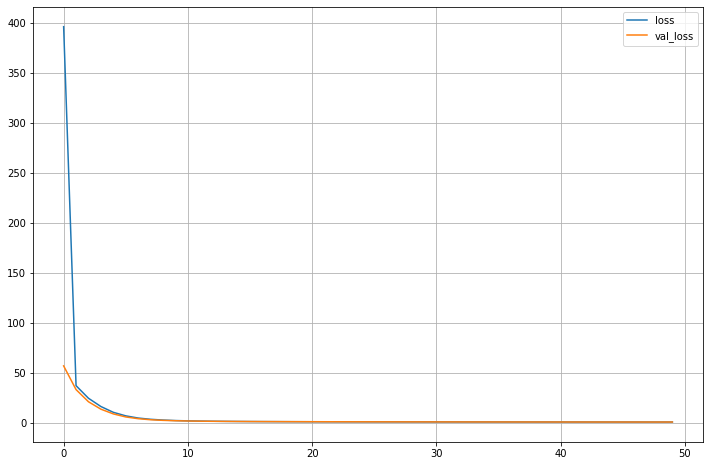

In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=[11]),
  ])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=losses.MeanSquaredError())

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean squared error on Test set:", mse)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(figsize=(12, 8))
cut_first_n = 0 # use this parameter to cut noise from your plot 
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax)
plt.grid(which='both')
plt.show()

# Over- and Underfitting
- Signal
- Noise

In [ ]:
X = df_pima.copy()
y = X.pop('class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

Epoch 1/200
2/2 [==============================] - 1s 205ms/step - loss: 12.7001 - binary_accuracy: 0.4725 - val_loss: 10.1177 - val_binary_accuracy: 0.3577
Epoch 2/200
2/2 [==============================] - 0s 44ms/step - loss: 7.5964 - binary_accuracy: 0.5112 - val_loss: 6.0685 - val_binary_accuracy: 0.6423
Epoch 3/200
2/2 [==============================] - 0s 46ms/step - loss: 5.2652 - binary_accuracy: 0.6497 - val_loss: 2.1039 - val_binary_accuracy: 0.6423
Epoch 4/200
2/2 [==============================] - 0s 42ms/step - loss: 1.9405 - binary_accuracy: 0.4990 - val_loss: 2.7526 - val_binary_accuracy: 0.3577
Epoch 5/200
2/2 [==============================] - 0s 42ms/step - loss: 1.9513 - binary_accuracy: 0.4562 - val_loss: 0.9339 - val_binary_accuracy: 0.5772
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 1.1103 - binary_accuracy: 0.6415 - val_loss: 1.4974 - val_binary_accuracy: 0.6423
Epoch 7/200
2/2 [==============================] - 0s 46ms/step - loss: 1

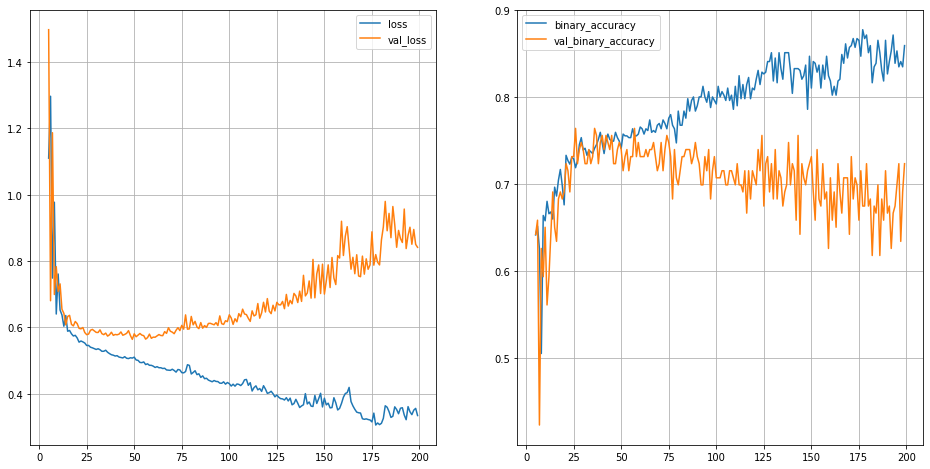

CPU times: user 21.7 s, sys: 1.08 s, total: 22.8 s
Wall time: 21.6 s


In [ ]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
  ])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=200,
          batch_size=256,
          verbose=1)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, np.round(predictions, decimals=0))
print("Accuracy Test set:", acc)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 5 # use this parameter to cut noise from your plot 
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

## Early Stopping

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,    # minimium amount of change to count as an improvement
    patience=20,        # how many epochs to wait before stopping
    restore_best_weights=True,
)

Epoch 1/200
2/2 [==============================] - 1s 192ms/step - loss: 9.7049 - binary_accuracy: 0.4868 - val_loss: 14.7740 - val_binary_accuracy: 0.6423
Epoch 2/200
2/2 [==============================] - 0s 48ms/step - loss: 11.8126 - binary_accuracy: 0.6497 - val_loss: 2.5240 - val_binary_accuracy: 0.6423
Epoch 3/200
2/2 [==============================] - 0s 53ms/step - loss: 3.3361 - binary_accuracy: 0.5010 - val_loss: 6.0441 - val_binary_accuracy: 0.3577
Epoch 4/200
2/2 [==============================] - 0s 45ms/step - loss: 4.3973 - binary_accuracy: 0.3503 - val_loss: 2.1849 - val_binary_accuracy: 0.4878
Epoch 5/200
2/2 [==============================] - 0s 45ms/step - loss: 1.5438 - binary_accuracy: 0.6171 - val_loss: 2.0764 - val_binary_accuracy: 0.6423
Epoch 6/200
2/2 [==============================] - 0s 42ms/step - loss: 2.1231 - binary_accuracy: 0.6497 - val_loss: 1.7194 - val_binary_accuracy: 0.6179
Epoch 7/200
2/2 [==============================] - 0s 41ms/step - loss: 1

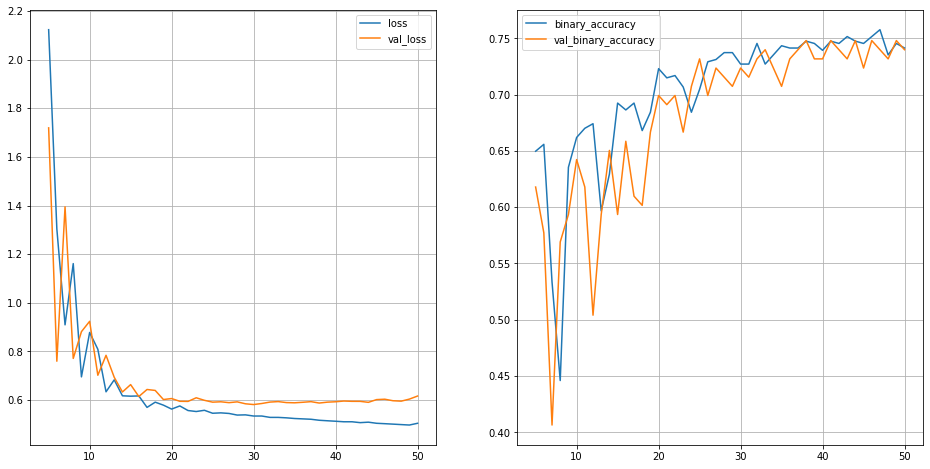

CPU times: user 6.27 s, sys: 272 ms, total: 6.54 s
Wall time: 5.02 s


In [ ]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
  ])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=200,
          batch_size=256,
          verbose=1,
          callbacks=[early_stopping])

predictions = model.predict(X_test)
acc = accuracy_score(y_test, np.round(predictions, decimals=0))
print("Accuracy Test set:", acc)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 5 # use this parameter to cut noise from your plot 
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

## Dropout
- Spurious patterns
- Conspiracy of weights
- Ensemble of networks

In [ ]:
%%html
<img src="https://i.imgur.com/a86utxY.gif" width="60%"/>

Epoch 1/200
2/2 [==============================] - 1s 200ms/step - loss: 8.7855 - binary_accuracy: 0.5540 - val_loss: 7.6975 - val_binary_accuracy: 0.6423
Epoch 2/200
2/2 [==============================] - 0s 46ms/step - loss: 5.1511 - binary_accuracy: 0.5723 - val_loss: 5.4328 - val_binary_accuracy: 0.3577
Epoch 3/200
2/2 [==============================] - 0s 46ms/step - loss: 4.6360 - binary_accuracy: 0.3849 - val_loss: 1.0823 - val_binary_accuracy: 0.5691
Epoch 4/200
2/2 [==============================] - 0s 46ms/step - loss: 2.0410 - binary_accuracy: 0.5845 - val_loss: 2.5697 - val_binary_accuracy: 0.6423
Epoch 5/200
2/2 [==============================] - 0s 49ms/step - loss: 2.2628 - binary_accuracy: 0.6640 - val_loss: 1.4153 - val_binary_accuracy: 0.6423
Epoch 6/200
2/2 [==============================] - 0s 51ms/step - loss: 1.3576 - binary_accuracy: 0.6049 - val_loss: 1.1706 - val_binary_accuracy: 0.4309
Epoch 7/200
2/2 [==============================] - 0s 48ms/step - loss: 1.4

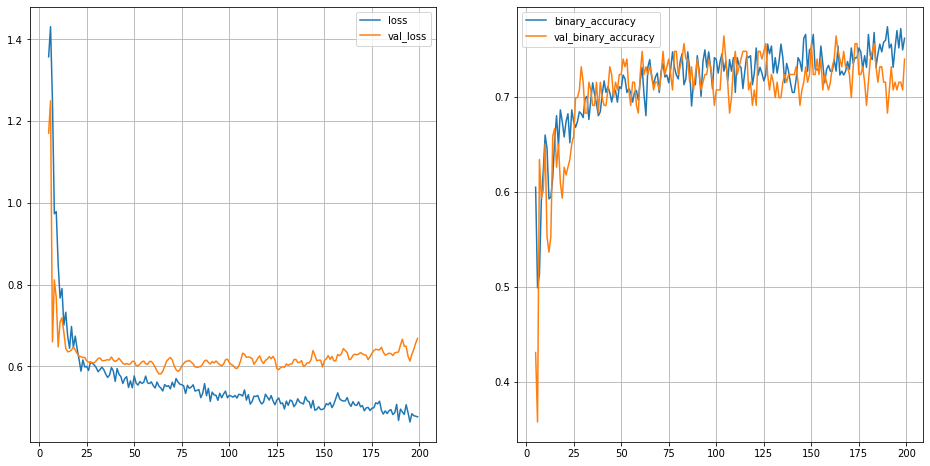

CPU times: user 24.5 s, sys: 1.34 s, total: 25.9 s
Wall time: 22 s


In [ ]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1, activation='sigmoid'),
  ])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

# store the best weights
checkpoint_filepath = os.path.join(data_dir, 'weights.h5')
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                   monitor='val_loss',
                                                   mode='min',
                                                   save_best_only=True)

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=200,
          batch_size=256,
          verbose=1,
          callbacks=[model_checkpoint])

model.load_weights(checkpoint_filepath)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, np.round(predictions, decimals=0))
print("Accuracy Test set:", acc)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 5 # use this parameter to cut noise from your plot 
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

## Batch Normalization
- Correct slow or unstable trianing.
- If it's good to normalize data at the input, it may also help to normalize it within the network.
- Batch normalization is a trainable coordinate rescaling of the input.

Epoch 1/200
2/2 [==============================] - 1s 214ms/step - loss: 0.9486 - binary_accuracy: 0.5499 - val_loss: 7.9577 - val_binary_accuracy: 0.3577
Epoch 2/200
2/2 [==============================] - 0s 54ms/step - loss: 0.8061 - binary_accuracy: 0.6171 - val_loss: 10.9776 - val_binary_accuracy: 0.3577
Epoch 3/200
2/2 [==============================] - 0s 50ms/step - loss: 0.7775 - binary_accuracy: 0.6151 - val_loss: 14.5775 - val_binary_accuracy: 0.3577
Epoch 4/200
2/2 [==============================] - 0s 50ms/step - loss: 0.7050 - binary_accuracy: 0.7006 - val_loss: 14.7132 - val_binary_accuracy: 0.3577
Epoch 5/200
2/2 [==============================] - 0s 58ms/step - loss: 0.7012 - binary_accuracy: 0.7128 - val_loss: 12.9901 - val_binary_accuracy: 0.3577
Epoch 6/200
2/2 [==============================] - 0s 50ms/step - loss: 0.7815 - binary_accuracy: 0.6456 - val_loss: 11.5076 - val_binary_accuracy: 0.3577
Epoch 7/200
2/2 [==============================] - 0s 50ms/step - loss

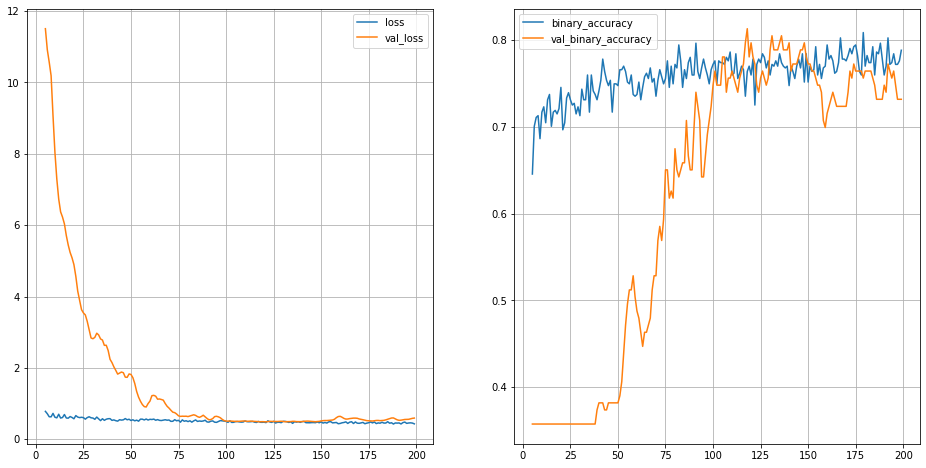

CPU times: user 27.4 s, sys: 1.79 s, total: 29.2 s
Wall time: 25.1 s


In [ ]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(1, activation='sigmoid'),
  ])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

# store the best weights
checkpoint_filepath = os.path.join(data_dir, 'weights.h5')
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                   monitor='val_loss',
                                                   mode='min',
                                                   save_best_only=True)

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=200,
          batch_size=256,
          verbose=1,
          callbacks=[model_checkpoint])

model.load_weights(checkpoint_filepath)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, np.round(predictions, decimals=0))
print("Accuracy Test set:", acc)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 5 # use this parameter to cut noise from your plot 
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

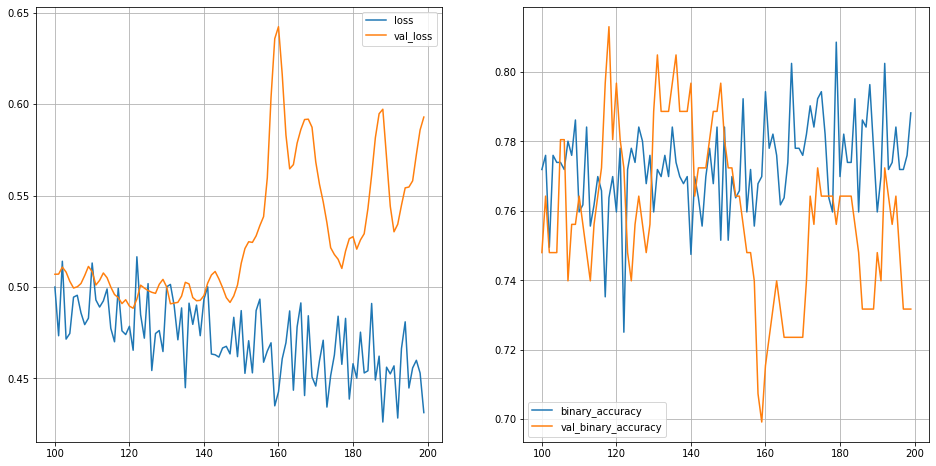

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 100 # use this parameter to cut noise from your plot 
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

# ❓ Exercise

Let's predict the popularity of tracks on Spotify, based on its:
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms
- playlist_genre

## Data

In [ ]:
download_save('https://kauthentechstorage.blob.core.windows.net/datasets/spotify.xls',
              'spotify.csv')

In [ ]:
df_spotify = pd.read_csv(os.path.join(data_dir, 'spotify.csv'))
print(df_spotify.shape)
df_spotify.sample(10)

(32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
27328,0aUP7s7O3m8xFnQ1Ju0xbZ,Trouble,Annella,44,065YosCANMb3iddT5Dv53h,Trouble,2019-03-25,Electro Swing Top 100,5M7xLCQTYJL0lbKIrUn3a4,edm,electro house,0.688,0.913,7,-3.726,1,0.0434,0.02230,0.000011,0.2700,0.534,128.006,195463
18436,3WymtMDNolaLX6V9pZsBQ4,How Crazy Is That,Derrick Ryan,30,11FR6XYdggv90SJrfUcvre,How Crazy Is That,2019-12-27,RADIO POP CHARTS,6Hbd65HmEAxTJ3cHZNUz2h,latin,latin pop,0.782,0.326,6,-12.198,0,0.0754,0.05850,0.000009,0.1320,0.197,123.940,193548
4477,6uCmU6ldcsVpLAKNCojVg8,Fire Escape,Andrew McMahon in the Wilderness,53,4scns5rvvp6KbYQgSsQ8Zv,Zombies On Broadway,2017-02-10,Indie Poptimism,1pZWCY50kMUhshcESknir8,pop,indie poptimism,0.583,0.862,4,-4.387,1,0.0575,0.04680,0.000000,0.2560,0.422,105.999,204840
14489,76TpWFiK5YCgw1hy26DWZp,What Is Life,George Harrison,66,4I4xtHaIFOzhZfp1NIHkY6,All Things Must Pass (Remastered),1970-11-27,I didn’t know perm stood for permanent (wave),3e6gYPyrTbaB8BWgSHCt5j,rock,permanent wave,0.468,0.833,4,-5.847,1,0.0324,0.00654,0.000332,0.3260,0.884,131.248,264413
29168,4OI4viYLfwLgFa1lEXBHVA,Love On Myself - Keanu Silva Remix,Felix Jaehn,59,2LEA8Pho88ignp2d9ppDPx,Love On Myself (Keanu Silva Remix),2019-08-23,Trance Party 2019 by FUTURE TRANCE,2yofeyPwe0ZNmJHTrGz2Qt,edm,big room,0.740,0.963,8,-3.357,0,0.0894,0.01620,0.000013,0.0590,0.605,125.985,174612
6163,1WIfWj5skn5UUZTs4cEFBe,Location,Khalid,63,5f4VQ4QMbjZLMfxL7RM5aE,Location,2017-10-31,Hip Hop Controller,37i9dQZF1DWT5MrZnPU1zD,rap,hip hop,0.799,0.436,1,-9.975,0,0.3790,0.28300,0.000105,0.0968,0.311,80.028,217566
16672,6NTwqaUxw06ege5fPSFGiR,Oasis - Ao Vivo no Estúdio MangoLab,Potyguara Bardo,52,0ehSS67SsUDNU0N1Royxra,Oasis (Ao Vivo no Estúdio MangoLab),2019-08-16,Orgulho Tropical,37i9dQZF1DWZ8fJXMbebf9,latin,tropical,0.660,0.491,9,-8.368,1,0.0697,0.82800,0.000000,0.1510,0.322,124.027,263640
24014,5iphDPHUbJ8DS14jCLIIlh,Saide (Sad Song) - English Version,Gliffo,39,22tfDmEHEhuO7Dp1A1auH6,Saide (Sad Song) [English Version],2019-12-06,Fresh Essentials,4RFszTXlSMZFgpqIJS3754,r&b,hip pop,0.602,0.488,9,-10.473,0,0.0254,0.73800,0.008130,0.9660,0.314,76.000,308783
26091,5dd8tOJwLqEvasVqvvrJzV,On & On,Erykah Badu,49,0ANbEIqol6OKQl36DYBAom,Baduizm - Special Edition,1997-02-11,Neo Soul,2YPP7fiYu5pIcp2yyHvw4A,r&b,neo soul,0.766,0.397,11,-10.414,0,0.1540,0.04730,0.007650,0.2610,0.344,80.421,225973
12774,2ySmDfSawPEwvjDOxUQvnq,Oh Lori,Alessi Brothers,47,1WABgS1g9NMV8cpwDS4aDY,The Best Of The Alessi Brothers,1998-01-01,Soft Rock Drive,37i9dQZF1DX6TIU4D13lOY,rock,classic rock,0.597,0.289,11,-11.987,0,0.0355,0.78900,0.000000,0.1340,0.341,135.166,199693


## Train, Test and Validation Sets

In [ ]:
X = df_spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

# Select features
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

# To prevent signal leakage, we do a "grouped" split to keep all of an artist's songs in either the trianing or the test split
def group_split(X, y, group, train_size=0.8):
  splitter = GroupShuffleSplit(train_size=train_size, random_state=10)
  train, test = next(splitter.split(X, y, groups=group))
  return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

# Train, validation and test splits
X_train, X_test, y_train, y_test = group_split(X, y, artists)
X_train, X_valid, y_train, y_valid = group_split(X_train, y_train, artists.loc[X_train.index], train_size=0.9)

# Encode & Preprocess features
preprocessor = make_column_transformer((StandardScaler(), features_num),
                                       (OneHotEncoder(), features_cat))

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

y_train = y_train / 100 # Bring popularity to a scale from 0 to 1
y_valid = y_valid / 100
y_test = y_test / 100

input_shape = [X_train.shape[1]]

print(f"Train shape: X:{X_train.shape}, y:{y_train.shape}")
print(f"Valid shape: X:{X_valid.shape}, y:{y_valid.shape}")
print(f"Test shape: X:{X_test.shape}, y:{y_test.shape}")

Train shape: X:(23742, 18), y:(23742,)
Valid shape: X:(2592, 18), y:(2592,)
Test shape: X:(6494, 18), y:(6494,)


 ## Models

### Linear Model

Minimum Test Loss: 0.2052


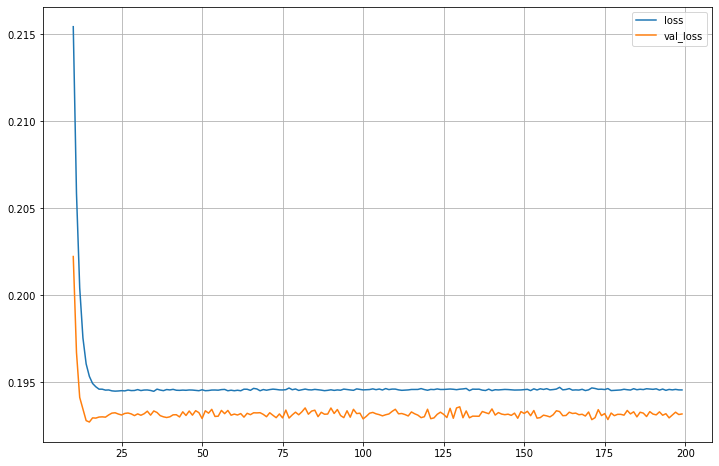

In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])

model.compile(optimizer='adam',
              loss='mae')

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    verbose=0)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Minimum Test Loss: {mae:.4f}")

fig, ax = plt.subplots(figsize=(12, 8))
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot(ax=ax)
plt.grid(which='both')
plt.show()

❓ Does the linear model under- or overfit?

### More Capacity
❓ Add more capacity to the network:
- 1 hidden layer with 128 units and relu activation
- 1 hidden layer with 64 units and relu activation

❓ 
- Has the under/overfitting situation changed?
- Has the result improved?

### Early Stopping
- To your previous network, add an early stopping callback that waits 30 epochs for any improvement in validation loss and keeps the weights with the best loss.

❓ 
- Has the under/overfitting situation changed?
- Has the result improved?

### Dropout
- Add 50% dropout afer each hidden layer of your previous network

❓ 
- Has the under/overfitting situation changed?
- Has the result improved?

### Batch Normalization
- Use your previous network on the data without scaling the numeric features.
- Remove the early stopping rule
- Plot the results starting at epoch 50

- Then add batch normalization

In [ ]:
X = df_spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

# Select features
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

# To prevent signal leakage, we do a "grouped" split to keep all of an artist's songs in either the trianing or the test split
def group_split(X, y, group, train_size=0.8):
  splitter = GroupShuffleSplit(train_size=train_size, random_state=10)
  train, test = next(splitter.split(X, y, groups=group))
  return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

# Train, validation and test splits
X_train, X_test, y_train, y_test = group_split(X, y, artists)
X_train, X_valid, y_train, y_valid = group_split(X_train, y_train, artists.loc[X_train.index], train_size=0.9)

# Encode & Preprocess features
preprocessor = make_column_transformer(('passthrough', features_num),
                                       (OneHotEncoder(), features_cat))

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

y_train = y_train / 100 # Bring popularity to a scale from 0 to 1
y_valid = y_valid / 100
y_test = y_test / 100

input_shape = [X_train.shape[1]]

print(f"Train shape: X:{X_train.shape}, y:{y_train.shape}")
print(f"Valid shape: X:{X_valid.shape}, y:{y_valid.shape}")
print(f"Test shape: X:{X_test.shape}, y:{y_test.shape}")

Train shape: X:(23742, 18), y:(23742,)
Valid shape: X:(2592, 18), y:(2592,)
Test shape: X:(6494, 18), y:(6494,)


❓ 
- Has the under/overfitting situation changed?
- Has the result improved?